In [146]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pylab import *
import seaborn as sns
df = pd.read_csv('datasets/smarket.csv', index_col=0 , parse_dates=True)
print(df)
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


             Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Today Direction
Year                                                                   
2001-01-01  0.381 -0.192 -2.624 -1.055  5.010  1.19130  0.959        Up
2001-01-01  0.959  0.381 -0.192 -2.624 -1.055  1.29650  1.032        Up
2001-01-01  1.032  0.959  0.381 -0.192 -2.624  1.41120 -0.623      Down
2001-01-01 -0.623  1.032  0.959  0.381 -0.192  1.27600  0.614        Up
2001-01-01  0.614 -0.623  1.032  0.959  0.381  1.20570  0.213        Up
...           ...    ...    ...    ...    ...      ...    ...       ...
2005-01-01  0.422  0.252 -0.024 -0.584 -0.285  1.88850  0.043        Up
2005-01-01  0.043  0.422  0.252 -0.024 -0.584  1.28581 -0.955      Down
2005-01-01 -0.955  0.043  0.422  0.252 -0.024  1.54047  0.130        Up
2005-01-01  0.130 -0.955  0.043  0.422  0.252  1.42236 -0.298      Down
2005-01-01 -0.298  0.130 -0.955  0.043  0.422  1.38254 -0.489      Down

[1250 rows x 8 columns]


In [4]:
df.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [6]:
df.corr(method = 'pearson')

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [8]:
model = smf.glm(formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())
predictions = result.predict()
# print(predictions)


                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Wed, 28 Apr 2021   Deviance:                       1727.6
Time:                                          15:41:18   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [10]:
c=0
predictions_up_down = []
for i in predictions:
    if(i<0.5):
        predictions_up_down.append("Up")
    if(i>0.5):
        predictions_up_down.append("Down")
        
# for c in predictions_up_down:
#     print(c)
    
  

    

In [12]:
data_confusion = {'y_real':df.Direction , 'y_pred':predictions_up_down}
# print(data_confusion)

df_confusion = pd.DataFrame(data_confusion, columns=['y_real','y_pred'])
# print (df_confusion
confusion_matrix = pd.crosstab(df_confusion['y_real'], df_confusion['y_pred'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  Down   Up
Actual              
Down        145  457
Up          141  507


In [31]:
# training on data before 2005
x_train = df[:'2004'][:]
y_train = df[:'2004']['Direction']
model_new = smf.glm(formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume' , data = x_train , family = sm.families.Binomial())
result_new = model_new.fit()

# testing 
x_test = df['2005':][:]
y_test = df['2005':]['Direction']

predictions_new = result_new.predict(x_test)

predictions_new_up_down = []
for i in predictions_new:
    if(i<0.5):
        predictions_new_up_down.append("Up")
    if(i>0.5):
        predictions_new_up_down.append("Down")
        
# creating a confusion matrix of the data
data_confusion_new = {'y_real_2005':y_test , 'y_pred_2005':predictions_new_up_down}

df_confusion = pd.DataFrame(data_confusion_new, columns=['y_real_2005','y_pred_2005'])
confusion_matrix = pd.crosstab(df_confusion['y_real_2005'], df_confusion['y_pred_2005'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
# print(y_test)
# print(predictions_new_up_down)



Predicted  Down  Up
Actual             
Down         77  34
Up           97  44


Coeffecients:  [[-0.05555211 -0.04443425]]


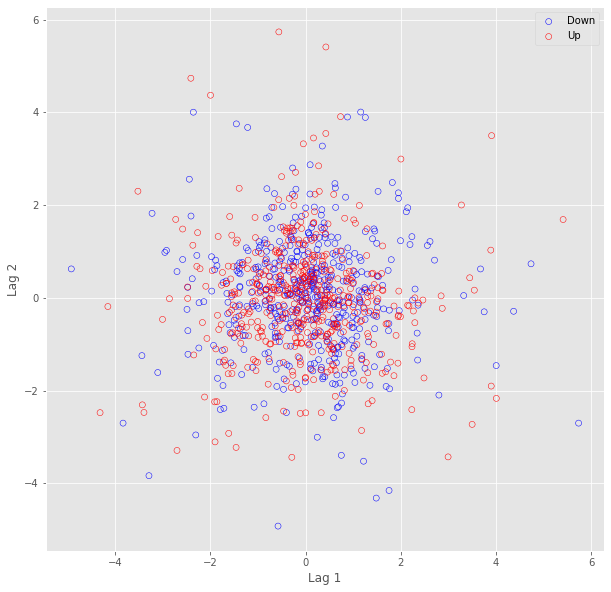

In [137]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda_clf = LinearDiscriminantAnalysis(solver='lsqr',store_covariance=True)
Y_train = pd.get_dummies(y_train).drop(columns='Down')
X_train = x_train.drop(columns = ['Direction','Lag3','Lag4','Lag5','Volume','Today'])
X_test = x_test.drop(columns = ['Direction','Lag3','Lag4','Lag5','Volume','Today'])
Y_test = (pd.DataFrame(pd.get_dummies(y_test).drop(columns='Down'))).values.tolist()

Y_test = [item for sublist in Y_test for item in sublist]

model_lda = lda_clf.fit(X_train , Y_train.values.ravel())
# print(X_train)
prediction_lda = model_lda.predict(X_test)
prediction_lda_df = pd.DataFrame(prediction_lda)
print('Coeffecients: ',lda_clf.coef_)

prediction_lda = prediction_lda.tolist()

Y_trainList = Y_train.values.tolist()
lag1_up = []
lag1_down = []
lag2_up = []
lag2_down = []
c=0
for i in Y_trainList:
    if(i==[0]):
        lag1_down.append(X_train.Lag1[c])
        lag2_down.append(X_train.Lag2[c])
    else:
        lag1_up.append(X_train.Lag1[c])
        lag2_up.append(X_train.Lag2[c])
    c+=1
    
fig , ax = plt.subplots(figsize=(10,10))
plt.scatter(lag1_down, lag2_down , facecolors='' , edgecolors='blue', label='Down')
plt.scatter(lag1_up , lag2_up , facecolors='none' , edgecolors='red', label='Up')
ax.set_xlabel('Lag 1')
ax.set_ylabel('Lag 2')
ax.legend()
# print(lag1_down)
# plt.contourf(xx, yy, zz, cmap='Paired')


<AxesSubplot:>

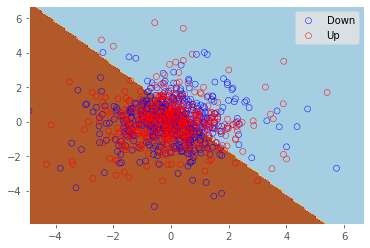

In [157]:
min1 , max1 = X_train.iloc[: , 0].min() , X_train.iloc[: , 0].max()+1
min2 , max2 = X_train.iloc[:, 1].min()-1 , X_train.iloc[:, 1].max()+1

x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

xx, yy = meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = hstack((r1,r2))

yhat = lda_clf.predict(grid)

zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(x=lag1_down, y=lag2_down, facecolor='none',edgecolor='blue' , label='Down')
sns.scatterplot(x=lag1_up, y=lag2_up,facecolor='none' , edgecolor='red', label = 'Up' )

In [18]:
data_confusion_lda = {'y_real_lda':Y_test , 'y_pred_lda':prediction_lda}
# # print(data_confusion_lda)
df_confusion_lda = pd.DataFrame(data_confusion_lda, columns=['y_real_lda','y_pred_lda'])
# # print(df_confusion_lda)
confusion_matrix = pd.crosstab(df_confusion_lda['y_real_lda'], df_confusion_lda['y_pred_lda'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0    1
Actual            
0          35   76
1          35  106


In [20]:
# Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_clf = QuadraticDiscriminantAnalysis()
model_qda = qda_clf.fit(X_train , Y_train.values.ravel())
prediction_lda = model_lda.predict(X_test)
# predicting using qda
prediction_qda = model_qda.predict(X_test)
prediction_qda_df = pd.DataFrame(prediction_qda)
prediction_qda = prediction_qda.tolist()
print('Priors : ', model_qda.priors_)
print('Means : ', model_qda.means_)

Priors :  [0.49198397 0.50801603]
Means :  [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


<AxesSubplot:>

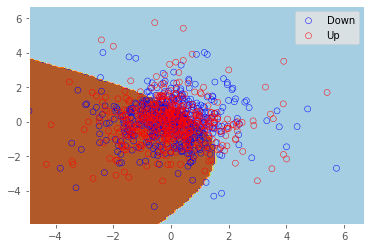

In [158]:
min1 , max1 = X_train.iloc[: , 0].min() , X_train.iloc[: , 0].max()+1
min2 , max2 = X_train.iloc[:, 1].min()-1 , X_train.iloc[:, 1].max()+1

x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

xx, yy = meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = hstack((r1,r2))

yhat = qda_clf.predict(grid)

zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
sns.scatterplot(x=lag1_down, y=lag2_down, facecolor='none',edgecolor='blue' , label='Down')
sns.scatterplot(x=lag1_up, y=lag2_up,facecolor='none' , edgecolor='red', label = 'Up' )

In [22]:
data_confusion_qda = {'y_real_qda':Y_test , 'y_pred_qda':prediction_qda}
# # print(data_confusion_lda)
df_confusion_qda = pd.DataFrame(data_confusion_qda, columns=['y_real_qda','y_pred_qda'])
# # print(df_confusion_lda)
confusion_matrix = pd.crosstab(df_confusion_qda['y_real_qda'], df_confusion_qda['y_pred_qda'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0    1
Actual            
0          30   81
1          20  121


In [24]:
# Implementing KNN using K=1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
model_knn = knn.fit(X_train , Y_train.values.ravel())
prediction_knn = model_knn.predict(X_test)
# confusion matrix for KNN
data_confusion_knn = {'y_real_knn':Y_test , 'y_pred_knn':prediction_knn}
df_confusion_knn = pd.DataFrame(data_confusion_knn, columns=['y_real_knn','y_pred_knn'])
# # print(df_confusion_lda)
confusion_matrix = pd.crosstab(df_confusion_knn['y_real_knn'], df_confusion_knn['y_pred_knn'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0   1
Actual           
0          43  68
1          58  83


In [26]:
# Implementing KNN using K=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
model_knn3 = knn.fit(X_train , Y_train.values.ravel())
prediction_knn3 = model_knn3.predict(X_test)
# confusion matrix for KNN
data_confusion_knn3 = {'y_real_knn':Y_test , 'y_pred_knn':prediction_knn3}
df_confusion_knn3 = pd.DataFrame(data_confusion_knn3, columns=['y_real_knn','y_pred_knn'])
# # print(df_confusion_lda)
confusion_matrix = pd.crosstab(df_confusion_knn3['y_real_knn'], df_confusion_knn3['y_pred_knn'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0   1
Actual           
0          48  63
1          55  86


In [28]:
# Applying KNN to Caravan dataset
# from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

caravan_df = pd.read_csv('datasets/caravan.csv')
x = caravan_df.iloc[: , 1:85]
scaler.fit(x)
x_train = x.iloc[1001:,:]
y_train = caravan_df.iloc[1001: , 86:]
x_test = x.iloc[0:1001 , :]
y_test = caravan_df.iloc[0:1001 , 86:].values.tolist()

y_test = [item for sublist in y_test for item in sublist]


knn = KNeighborsClassifier(n_neighbors=1)
model_knn_caravan = knn.fit(x_train , y_train.values.ravel())
prediction_caravan = model_knn_caravan.predict(x_test)

# finding accuracy of model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, prediction_caravan))

data_confusion_caravan = {'y_real_caravan':y_test , 'y_pred_caravan':prediction_caravan}
df_confusion_caravan = pd.DataFrame(data_confusion_caravan, columns=['y_real_caravan','y_pred_caravan'])
confusion_matrix = pd.crosstab(df_confusion_caravan['y_real_caravan'], df_confusion_caravan['y_pred_caravan'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)


Accuracy: 0.8911088911088911
Predicted    0   1
Actual            
0          879  63
1           46  13
